In [1]:
import pandas as pd
import numpy as np

## Load Dataset

In [2]:
# train data 불러오기
# datetime 컬럼을 date로 파싱
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Explore

데이터 분석에 들어가기 앞서,
1. 예측 값(count) 분포 분석
2. 각 feature 별 상관관계 분석(feature-feature 혹은 feature-예측값)
3. missing data 처리

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Count - Casual - Registered

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


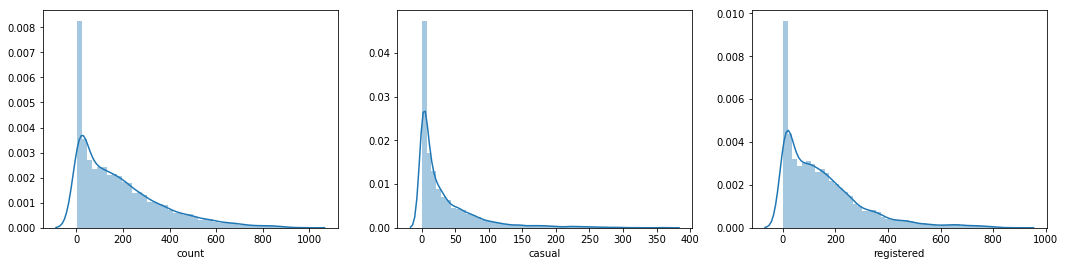

In [4]:
# 'count'의 분포(histogram) 및 기초통계량
print(train['count'].describe())

f, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
f.set_size_inches(18,4)
sns.distplot(train['count'], ax=ax1)
sns.distplot(train['casual'], ax=ax2)
sns.distplot(train['registered'], ax=ax3)

In [5]:
#skewness and kurtosis
print("Skewness : {0:.5f}".format(train['count'].skew()))
print("Kurtosis : {0:.5f}".format(train['count'].kurt()))

Skewness : 1.24207
Kurtosis : 1.30009


** Lesson Learned **
  * **count**는 전체적으로 왼쪽으로 치우쳐 있다.
  * **count**와 **registered**의 분포는 비슷한 데 비해, **casual**은 훨씬 더 왼쪽으로 치우쳐 있다. 즉, 비회원의 시간 당 대여 수는 대부분 적으며, 회원의 시간 당 대여 수와 비교했을 때에도 훨씬 적기 때문에 **count** 분포에 큰 영향을 미치지 못했다. 


### Correlation Matrix

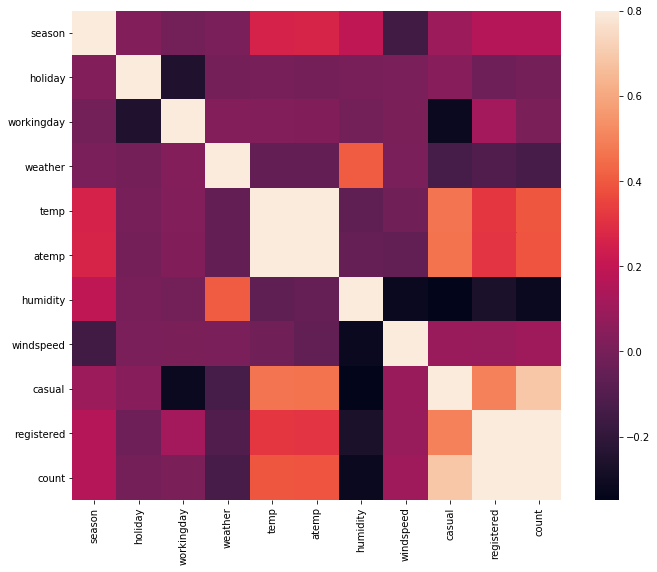

In [6]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

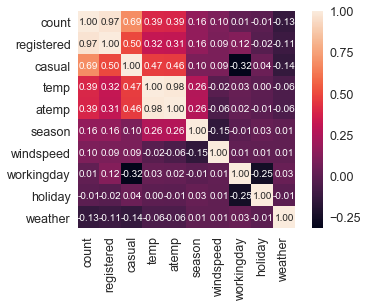

In [7]:
#count correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'count')['count'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

** Lesson Learned **
  * **registered** 와 **casual** 은 **count** 와 마찬가지로 예측값이기 때문에 feature 에서 제외한다.
  * **temp** 와 **atemp** 는 강한 양의 상관관계가 있는 것으로 나타났다.
  * **temp** 는 **count** 나 **registered** 보다 **casual** 과 더욱 상관관계가 깊다. 이는 기온에 따라 사람들이 "즉흥적으로" 자전거를 대여한다는 것을 알 수 있다.
  * **workingday** 와 **casual**는 약간의 음의 상관관계가 있는 것으로 나타났다. 이는 주중에는 사람들이 "즉흥적으로" 자전거를 대여하지 않는다는 것을 알 수 있다.

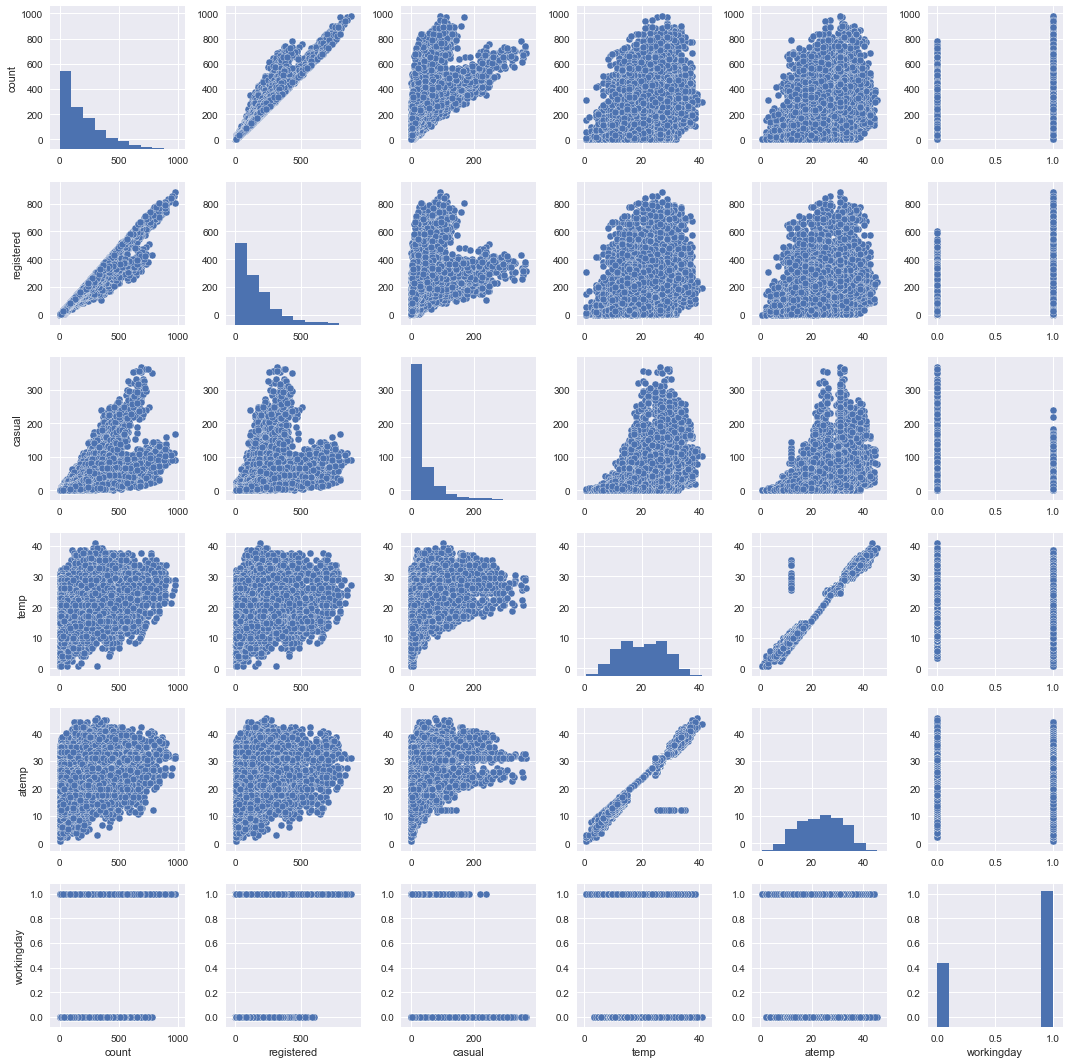

In [8]:
#scatterplot
sns.set()
cols = ['count', 'registered', 'casual', 'temp', 'atemp', 'workingday']
sns.pairplot(train[cols], size = 2.5)
plt.show();

** Lesson Learned **
  * **atemp** 에 outlier 가 보인다. 

### Explore datetime

In [9]:
# datetime 컬럼을 항목별(연-월-일-시-분-초)로 분리
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


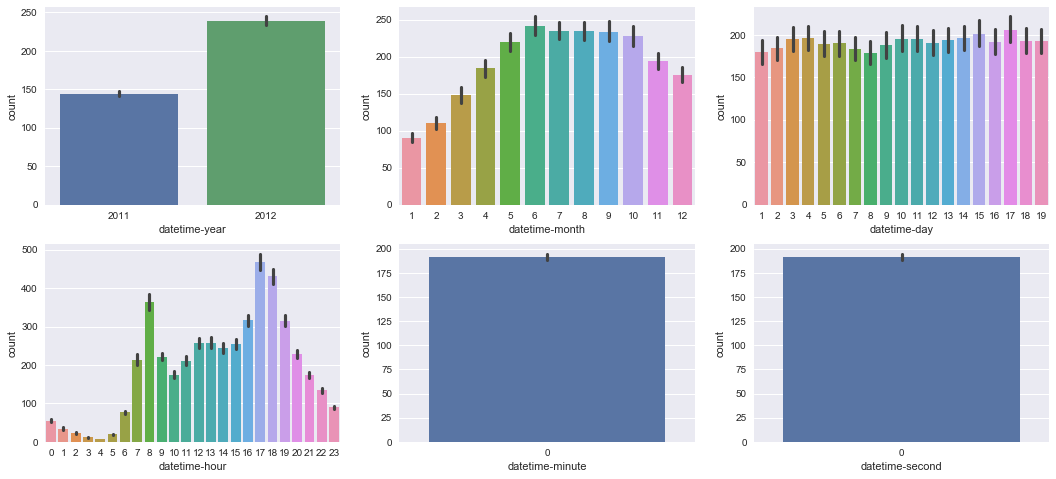

In [10]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

** Lesson Learned **
  * **datetime-minute**와 **datetime-second**는 현재 기록되고 있지 않다. 그러므로 사용할 필요가 없다.
  * train.csv와 test.csv는 **datetime-day**를 기준으로 나뉘어져 있다. 그러므로 **datetime-day**를 feature로 사용해서는 안 된다.
  * **datetime** 탐색에서 2011년과 2012년의 대여량 차이가 크게 나타났기 때문에 연도와 월을 합쳐서 시간 분포를 알아보고자 한다.


### Concatenate year and month

In [11]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year,datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 19)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


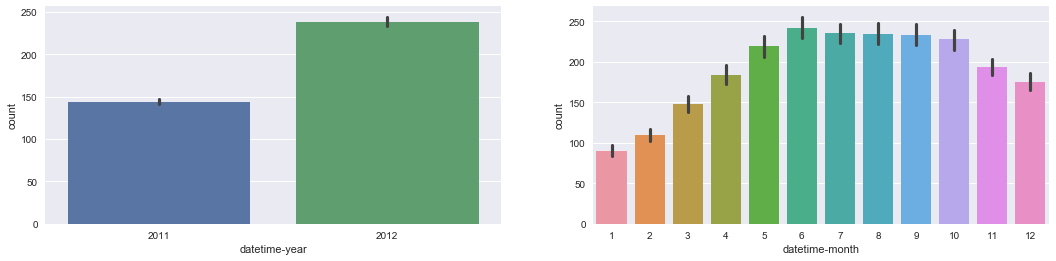

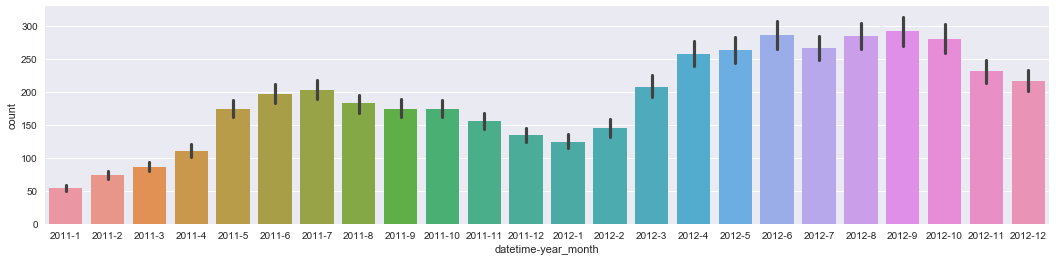

In [12]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)


figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

** Lesson Learned **
  * 2011년 12월과 2012년 1월의 자전거 대여량을 비슷하지만, 두 개를 따로 놓고 보면 이를 알 수 없다.

### Explore hour - workingday

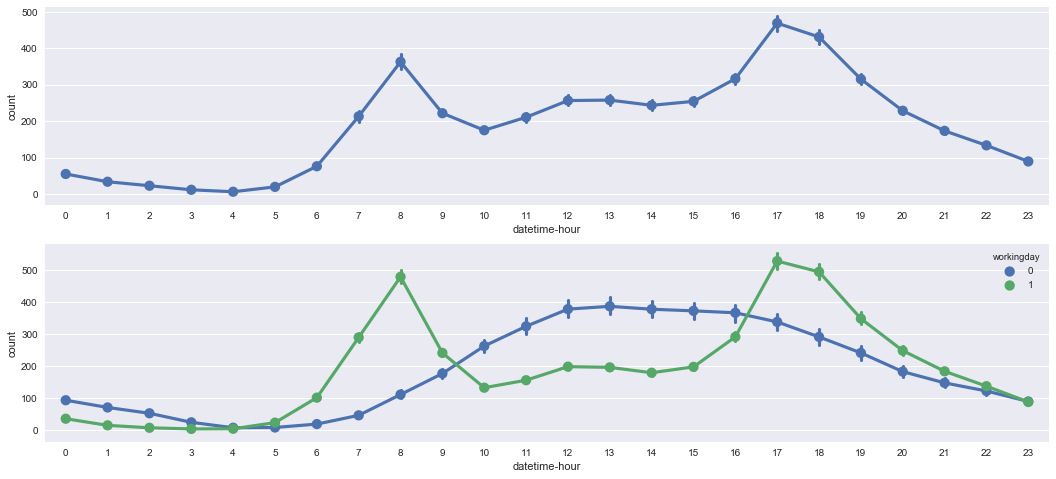

In [13]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

** Lesson Learned **
  * 주중(workingday==1)에는 출근 시간과 퇴근 시간에 자전거를 많이 대여한다.
  * 주말(workingday==0)에는 오후 시간에 자전거를 많이 대여한다.
  * 주중(월,화,수,목,금)이 주말(토,일)보다 많기 때문에, 두 개를 나눠서 보지 않으면 주말의 특성을 파악할 수 없다.

### Explore hour - dayofweek

In [21]:
# 요일별로 나눠서 보기
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 20)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


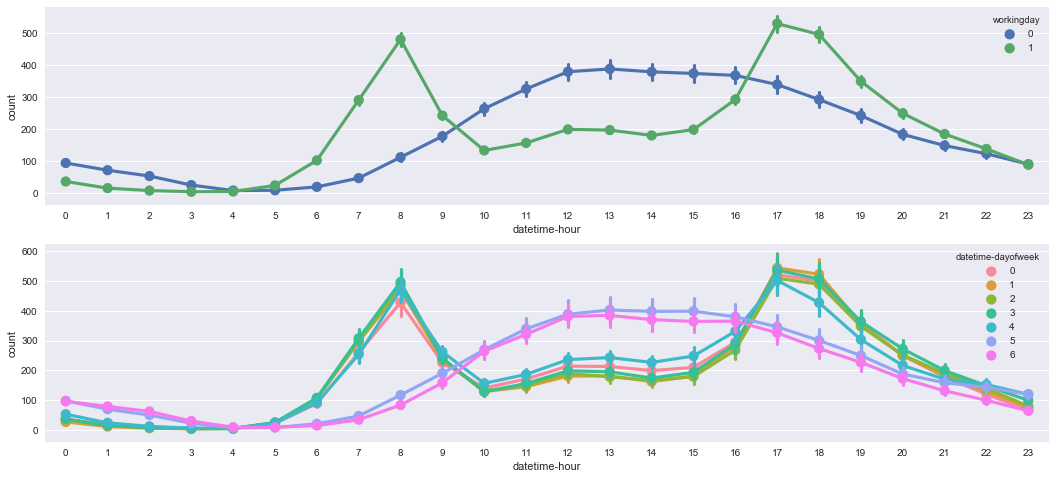

In [22]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

** Lesson Learned **
  * 금요일(workingday==4)는 주중이지만, 아주 약간 주말의 특성을 반영하고 있다.
  * 비슷하게 월요일(workingday==0)도 아주 약간 주말의 특성을 반영하고 있다.
  * 사람들이 휴가를 월요일과 금요일에 사용하기 때문이라고 추측할 수 있다.

## Reload Dataset

데이터 시각화를 하면서 데이터를 변경했기 때문에 train&test 데이터를 재로드한다.

In [23]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [24]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

다시 datetime 컬럼을 항목별(연-월-일-시-분-초)로 분리

In [25]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [26]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


## Train

In [27]:
# feature 선정: atemp / datetime-month / datetime-minute / datetime-second 제외
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [28]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 10)


,season,holiday,workingday,weather,temp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,81,0.0,2011,0,5
1,1,0,0,1,9.02,80,0.0,2011,1,5
2,1,0,0,1,9.02,80,0.0,2011,2,5
3,1,0,0,1,9.84,75,0.0,2011,3,5
4,1,0,0,1,9.84,75,0.0,2011,4,5


In [29]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 10)


,season,holiday,workingday,weather,temp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,56,26.0027,2011,0,3
1,1,0,1,1,10.66,56,0.0000,2011,1,3
2,1,0,1,1,10.66,56,0.0000,2011,2,3
3,1,0,1,1,10.66,56,11.0014,2011,3,3
4,1,0,1,1,10.66,56,11.0014,2011,4,3


In [30]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [31]:
# Root mean square error 계산에 앞서 미리 로그 변환
y_train = np.log(y_train + 1)

print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

## Score

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [32]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
#     log_predict = np.log(predict + 1)
#     log_actual = np.log(actual + 1)
    log_predict = predict + 1
    log_actual = actual + 1
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## Hyperparameter Tuning

* RandomForest Regressor 를 이용하여 학습시키고자 한다.
* 학습하기 전에 적절한 Hyperparameter 를 설정하기 위해 Grid Search 및 Random Search(Coarse -> Finer) 를 진행하고자 한다.
* cross validation score 로 비교하여 최적의 Hyperparameter 를 선정한다.

### Case 1 - Grid Search

In [86]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.cross_validation import cross_val_score

# n_estimators = 300

# max_depth_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

# hyperparameters_list = []

# for max_depth in max_depth_list:
#     for max_features in max_features_list:
#         model = RandomForestRegressor(n_estimators=n_estimators,
#                                       max_depth=max_depth,
#                                       max_features=max_features,
#                                       random_state=37,
#                                       n_jobs=-1)

#         score = cross_val_score(model, X_train, y_train, cv=20, \
#                                 scoring=rmsle_scorer).mean()

#         hyperparameters_list.append({
#             'score': score,
#             'n_estimators': n_estimators,
#             'max_depth': max_depth,
#             'max_features': max_features,
#         })

#         print("Score = {0:.5f}".format(score))

# hyperparameters_list

Score = 0.94084
Score = 0.69192
Score = 0.61101
Score = 0.58117
Score = 0.57797
Score = 0.58161
Score = 0.66013
Score = 0.47804
Score = 0.40227
Score = 0.37814
Score = 0.37199
Score = 0.37341
Score = 0.55690
Score = 0.41099
Score = 0.35854
Score = 0.34824
Score = 0.34865
Score = 0.35048
Score = 0.54213
Score = 0.40328
Score = 0.35716
Score = 0.34727
Score = 0.34792
Score = 0.35011
Score = 0.54367
Score = 0.40317
Score = 0.35680
Score = 0.34764
Score = 0.34810
Score = 0.35036
Score = 0.54074
Score = 0.40324
Score = 0.35625
Score = 0.34759
Score = 0.34805
Score = 0.35022
Score = 0.54097
Score = 0.40336
Score = 0.35638
Score = 0.34770
Score = 0.34793
Score = 0.35019
Score = 0.54096
Score = 0.40336
Score = 0.35638
Score = 0.34772
Score = 0.34792
Score = 0.35018
Score = 0.54096
Score = 0.40336
Score = 0.35638
Score = 0.34772
Score = 0.34792
Score = 0.35018
Score = 0.54096
Score = 0.40336
Score = 0.35638
Score = 0.34772
Score = 0.34792
Score = 0.35018


[{'max_depth': 5,
  'max_features': 0.1,
  'n_estimators': 300,
  'score': 0.94084439619892668},
 {'max_depth': 5,
  'max_features': 0.3,
  'n_estimators': 300,
  'score': 0.69191990382462709},
 {'max_depth': 5,
  'max_features': 0.5,
  'n_estimators': 300,
  'score': 0.61100942978431716},
 {'max_depth': 5,
  'max_features': 0.7,
  'n_estimators': 300,
  'score': 0.58117010668595215},
 {'max_depth': 5,
  'max_features': 0.9,
  'n_estimators': 300,
  'score': 0.57797358428278167},
 {'max_depth': 5,
  'max_features': 1.0,
  'n_estimators': 300,
  'score': 0.58160874620847192},
 {'max_depth': 10,
  'max_features': 0.1,
  'n_estimators': 300,
  'score': 0.66012978777669784},
 {'max_depth': 10,
  'max_features': 0.3,
  'n_estimators': 300,
  'score': 0.47803859749467481},
 {'max_depth': 10,
  'max_features': 0.5,
  'n_estimators': 300,
  'score': 0.40226557105369476},
 {'max_depth': 10,
  'max_features': 0.7,
  'n_estimators': 300,
  'score': 0.37813657917587473},
 {'max_depth': 10,
  'max_

In [87]:
# hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
# hyperparameters_list = hyperparameters_list.sort_values(by="score")

# print(hyperparameters_list.shape)
# hyperparameters_list.head()

(60, 4)


,max_depth,max_features,n_estimators,score
21,20,0.7,300,0.347271
33,30,0.7,300,0.347586
27,25,0.7,300,0.347641
39,35,0.7,300,0.347697
51,45,0.7,300,0.347718


### Case 2 - Random Search (Coarse Search)

In [88]:
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.cross_validation import cross_val_score

# hyperparameters_list = []

# n_estimators = 300
# num_epoch = 100

# for epoch in range(num_epoch):
#     max_depth = np.random.randint(low=2, high=100)
#     max_features = np.random.uniform(low=0.1, high=1.0)

#     model = RandomForestRegressor(n_estimators=n_estimators,
#                                   max_depth=max_depth,
#                                   max_features=max_features,
#                                   random_state=37,
#                                   n_jobs=-1)

#     score = cross_val_score(model, X_train, y_train, cv=20, \
#                             scoring=rmsle_scorer).mean()

#     hyperparameters_list.append({
#         'score': score,
#         'n_estimators': n_estimators,
#         'max_depth': max_depth,
#         'max_features': max_features,
#     })

#     print("Score = {0:.5f}".format(score))

# hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
# hyperparameters_list = hyperparameters_list.sort_values(by="score")

# print(hyperparameters_list.shape)
# hyperparameters_list.head()

Score = 0.34774
Score = 0.34787
Score = 0.34791
Score = 0.46067
Score = 0.34792
Score = 0.46067
Score = 0.35638
Score = 0.46067
Score = 0.40336
Score = 0.34772
Score = 0.46067
Score = 0.36918
Score = 0.34770
Score = 0.36939
Score = 0.46067
Score = 0.76227
Score = 0.94018
Score = 0.46067
Score = 0.34779
Score = 0.46066
Score = 0.34774
Score = 0.65489
Score = 0.34984
Score = 0.58622
Score = 0.40336
Score = 0.34779
Score = 0.36939
Score = 0.35073
Score = 0.34772
Score = 0.34774
Score = 0.34772
Score = 0.74571
Score = 0.35638
Score = 0.59215
Score = 0.36939
Score = 0.34772
Score = 0.46082
Score = 0.54037
Score = 0.35638
Score = 0.34984
Score = 0.34792
Score = 0.35087
Score = 0.46067
Score = 0.34792
Score = 0.37741
Score = 0.63614
Score = 0.36939
Score = 0.35638
Score = 0.54096
Score = 0.34772
Score = 0.34772
Score = 0.34774
Score = 0.36939
Score = 0.34772
Score = 0.48100
Score = 0.35637
Score = 0.40336
Score = 0.34774
Score = 0.35647
Score = 0.46073
Score = 0.40316
Score = 0.46065
Score = 

,max_depth,max_features,n_estimators,score
92,20,0.843287,300,0.346886
66,35,0.720608,300,0.347697
12,35,0.780731,300,0.347697
49,85,0.719107,300,0.347718
94,55,0.795032,300,0.347718


** Lesson Learned **
  * 상위 스코어 결과로 다음과 같이 범위를 좁힐 수 있다.
  * max_depth: 20~80 
  * max_features: 0.6~1.0

### Case 2 - Random Search(Finer Search)

In [26]:
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.cross_validation import cross_val_score

# hyperparameters_list = []

# n_estimators = 300
# num_epoch = 100

# for epoch in range(num_epoch):
#     max_depth = np.random.randint(low=20, high=80)
#     max_features = np.random.uniform(low=0.6, high=1.0)

#     model = RandomForestRegressor(n_estimators=n_estimators,
#                                   max_depth=max_depth,
#                                   max_features=max_features,
#                                   random_state=37,
#                                   n_jobs=-1)

#     score = cross_val_score(model, X_train, y_train, cv=20, \
#                             scoring=rmsle_scorer).mean()

#     hyperparameters_list.append({
#         'score': score,
#         'n_estimators': n_estimators,
#         'max_depth': max_depth,
#         'max_features': max_features,
#     })

#     print("Score = {0:.5f}".format(score))

# hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
# hyperparameters_list = hyperparameters_list.sort_values(by="score")

# print(hyperparameters_list.shape)
# hyperparameters_list.head()

/usr/local/var/pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Score = 0.34792
Score = 0.34767
Score = 0.34785
Score = 0.34772
Score = 0.34774
Score = 0.34772
Score = 0.34792
Score = 0.34792
Score = 0.34792
Score = 0.34772
Score = 0.34774
Score = 0.34984
Score = 0.34772
Score = 0.34772
Score = 0.34792
Score = 0.34984
Score = 0.34984
Score = 0.34774
Score = 0.34772
Score = 0.35002
Score = 0.34792
Score = 0.34984
Score = 0.34975
Score = 0.34800
Score = 0.34792
Score = 0.34792
Score = 0.34997
Score = 0.34773
Score = 0.34997
Score = 0.34792
Score = 0.34774
Score = 0.34792
Score = 0.34770
Score = 0.34774
Score = 0.34792
Score = 0.34984
Score = 0.34792
Score = 0.34984
Score = 0.34984
Score = 0.34984
Score = 0.34792
Score = 0.34774
Score = 0.34772
Score = 0.34774
Score = 0.34774
Score = 0.34772
Score = 0.34774
Score = 0.34796
Score = 0.34772
Score = 0.34772
Score = 0.34772
Score = 0.34769
Score = 0.34984
Score = 0.34774
Score = 0.34772
Score = 0.34792
Score = 0.34984
Score = 0.34769
Score = 0.34805
Score = 0.34774
Score = 0.34774
Score = 0.34774
Score = 

,max_depth,max_features,n_estimators,score
82,21,0.981165,300,0.347420
88,21,0.957059,300,0.347420
92,25,0.775415,300,0.347641
1,24,0.928722,300,0.347666
51,32,0.785443,300,0.347690


** Lesson Learned **
  * 위에서 가장 좋은 스코어(0.347420)를 낸 조합이 꼭 가장 잘 예측하는 것은 아니다.
  * 학습 데이터에 너무 편향되기 때문에 새로운 데이터에 대해선 오히려 예측률이 떨어질 수 있다.
  * 상위 스코어를 얻은 조합들을 여러개 시도해봐야 한다.

In [33]:
from sklearn.ensemble import RandomForestRegressor

# 아래 조합이 Best 는 아닐 수 있지만, 시도해본 조합 중 가장 예측을 잘했다.
model = RandomForestRegressor(n_estimators=3000,
                              max_depth=85,
                              max_features=0.719107	,
                              random_state=37,
                              n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=85,
           max_features=0.719107, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Train

In [34]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=85,
           max_features=0.719107, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [35]:
predictions = model.predict(X_test)

predictions = np.exp(predictions) - 1

print(predictions.shape)
predictions

(6493,)


array([  11.50379707,    4.68926675,    3.04463908, ...,  106.65089635,
         94.15467114,   47.04972342])

## Submit

In [36]:
submission = pd.read_csv("sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.503797
1,2011-01-20 01:00:00,4.689267
2,2011-01-20 02:00:00,3.044639
3,2011-01-20 03:00:00,2.877232
4,2011-01-20 04:00:00,2.482070


In [38]:
submission.to_csv("submit/mySubmission.csv", index=False)